In incidence geometry, a **plane** $\pi=(S,\mathscr L)$ consists of a set of points $S$, a collection $\mathscr L$ of subsets of $S$. Two lines $\ell$ and $m$ in $\mathscr L$ are **parallel**, denoted $\ell\parallel m$, if $\ell=m$ or $\ell\cap m=\emptyset$. The **parallel class** $[\ell]$ of a line $\ell$ is the set of lines which are parallel to $\ell$:
$$[l]=\{m\in\mathscr L:m\parallel l\}$$
Three points $P$, $Q$, and $R$ are **non-collinear** if no line contains all three points.

An **affine plane** is a plane $\pi=(S,\mathscr L)$ which satisfies three axioms:

A1. For every distinct pair of points $A$ and $B$ in $S$, there exists exactly one line denoted $AB$ passing through the points $A$ and $B$.
    
A2. For every line $\ell\in\mathscr L$ and every point $A\in S$ such that $P$ does not lie on $\ell$, there exists exactly one line $m\in\mathscr L$ containing $A$ which is parallel to $\ell\parallel m$.
    
A3. There exist three noncollinear points

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [10]:
from itertools import product

The smallest affine plane has 4 points and 6 lines:

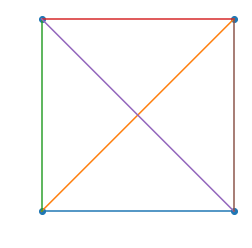

In [11]:
plt.axis('off')
plt.scatter([0,0,1,1],[0,1,0,1])
plt.plot([0,1],[0,0])
plt.plot([0,1],[0,1])
plt.plot([0,0],[0,1])
plt.plot([0,1],[1,1])
plt.plot([0,1],[1,0])
plt.plot([1,1],[0,1])
plt.axis('scaled')
plt.show()

The incidence matrix corresponding to the 4-point affine plane is:

$$\left[\begin{array}{cccccc}1&1&1&0&0&0\\1&0&0&1&1&0\\0&1&0&1&0&1\\0&0&1&0&1&1\end{array}\right]$$

Here is a naive algorithm to determine whether an arbitrary plane $(S,\mathscr L)$ is an affine plane:

In [23]:
def isAffineMatrix(I):
    S = I
    L = np.transpose(I)
    if np.sum(S) == 0 or len(np.unique(S, axis=0)) < len(S) or len(np.unique(L, axis=0)) < len(L):
        return False
    for a in L:
        for b in L:
            if any(a != b) and sum(a & b) > 1:
                return False
            for c in L:
                if sum(a & (b & c)) == sum(a & b) == sum(a & c) == 0 and sum(b & c) == 1:
                    return False
    for P in S:
        for Q in S:
            for R in S:
                if any(P != Q) and any(P != R) and any(Q != R) and sum(P & Q & R) == 0:
                    return True
    return False

In [24]:
I = np.array([[1,1,1,0,0,0],[1,0,0,1,1,0],[0,1,0,1,0,1],[0,0,1,0,1,1]])

In [25]:
isAffineMatrix(I)

True

Let's try to randomly generate the affine plane of order 2. The incidence matrix is $4\times 6$, so we only have to check $2^{24}$ incidence matrices. However, we need a new $\text{isAffinePlane}$ function to check incidence matrices.

In [26]:
def isAffinePlaneOrder(n):
    for x in product([0,1],repeat=n**3*(n+1)):
        I = np.array(x).reshape(n**2, n*(n+1))
        if isAffineMatrix(I):
            return I
    return False

In [27]:
A = isAffinePlaneOrder(2)

In [28]:
A

array([[0, 0, 0, 1, 1, 1],
       [0, 1, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 0]])

Great! The algorithm successfully found an affine plane of order 2. Given a specific indicidence matrix $I$, the time to check whether $I$ corresponds to an affine plane is $O(n^8)$. To perform this check for all incidence matrices we check $2^{n^3(n+1)}$. Thus the time to check whether an affine plane of order $n$ exists is $O(n^82^{n^4})$ (proof?) For order 12, we perform approximately $10^{54000}$ operations. This is not good. However, hopefully we can use Theorem 2 and plane isomorphism to reduce this number. For now we would like to use computational methods to disprove the existence of orders $n=6$ and $n=10$.

In general, most pairs $(S,\mathscr L)$ are not affine planes. The following theorems provide major restrictions on which pairs can be affine planes.

**Theorem 1.** Let $\pi$ be an affine plane. Then there is a bijection between each pair of lines of $\pi$.

**Definition:** An **affine plane of order $n$** is an affine plane in which all lines contain $n$ points.

For an affine plane of order $n$ with $n^2$ points and $n(n+1)$ lines we define the **incidence matrix** to be a $n^2\times n(n+1)$ matrix where the entry at $(i,j)$ is $1$ if the $i^\text{th}$ point lies on the $j^\text{th}$ line and $0$ otherwise.

**Theorem 2.** Let $\pi$ be an affine plane of order $n$. Then:

1. $\pi$ contains $n^2$ points

2. Each points lies on $n+1$ lines

3. There are $n$ parallel classes

4. Each parallel class contains $n$ lines 

5. There are $n(n+1)$ lines

**Theorem 3.** There exists an affine plane of order $p$ for every prime $p$.

Theorem 4 guarantees there is no affine plane of order 6. However, it does not apply to order 10, for which was verified by computer search that no affine plane of this order exists. Whether there exists an affine plane of order 12 is an open problem. Here is a naive algorithm to determine whether an arbitrary plane $(S,\mathscr L)$ is an affine plane: 

**Theorem 4 (Bruck-Ryser).** If $n$ is of the form $4k+1$ or $4k+2$ and $n$ is not the sum of two squares then there does not exist an affine plane of order $n$.